In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
data_dir = '/Users/michaeldoherty/git/XLRON/data/JOCN_SI/rwa_lr'

In [2]:
# Load the data
ksp_ff = pd.read_csv(f'{data_dir}/rwalr_ksp_ff_eval.csv')
ksp_ff_weighted = pd.read_csv(f'{data_dir}/rwalr_ksp_ff_weighted_eval.csv')
ff_ksp = pd.read_csv(f'{data_dir}/rwalr_ff_ksp_eval.csv')
ff_ksp_weighted = pd.read_csv(f'{data_dir}/rwalr_ff_ksp_weighted_eval.csv')
ksp_mu = pd.read_csv(f'{data_dir}/rwalr_ksp_mu_eval.csv')
ksp_mu_weighted = pd.read_csv(f'{data_dir}/rwalr_ksp_mu_weighted_eval.csv')
mu_ksp = pd.read_csv(f'{data_dir}/rwalr_mu_ksp_eval.csv')
mu_ksp_weighted = pd.read_csv(f'{data_dir}/rwalr_mu_ksp_weighted_eval.csv')
ksp_mu_alt = pd.read_csv(f'{data_dir}/rwalr_ksp_mu_alt_eval.csv')
ksp_mu_alt_weighted = pd.read_csv(f'{data_dir}/rwalr_ksp_mu_alt_weighted_eval.csv')
mu_ksp_alt = pd.read_csv(f'{data_dir}/rwalr_mu_ksp_alt_eval.csv')
mu_ksp_alt_weighted = pd.read_csv(f'{data_dir}/rwalr_mu_ksp_alt_weighted_eval.csv')
model = pd.read_csv(f'{data_dir}/rwalr_model_eval.csv')

# Increase text size
plt.rcParams.update({'font.size': 18})

In [3]:
# Calculate the difference in mean accepted services between the weighted and unweighted heuristics
ksp_ff_diff = (ksp_ff_weighted['accepted_services'] - ksp_ff['accepted_services']).mean()
ff_ksp_diff = (ff_ksp_weighted['accepted_services'] - ff_ksp['accepted_services']).mean()
ksp_mu_diff = (ksp_mu_weighted['accepted_services'] - ksp_mu['accepted_services']).mean()
mu_ksp_diff = (mu_ksp_weighted['accepted_services'] - mu_ksp['accepted_services']).mean()
ksp_mu_alt_diff = (ksp_mu_alt_weighted['accepted_services'] - ksp_mu_alt['accepted_services']).mean()
mu_ksp_alt_diff = (mu_ksp_alt_weighted['accepted_services'] - mu_ksp_alt['accepted_services']).mean()
print(f'KSP-FF: {ksp_ff_diff}')
print(f'FF-KSP: {ff_ksp_diff}')
print(f'KSP-MU: {ksp_mu_diff}')
print(f'MU-KSP: {mu_ksp_diff}')
print(f'KSP-MU-Alt: {ksp_mu_alt_diff}')
print(f'MU-KSP-Alt: {mu_ksp_alt_diff}')
print("---")

# Find differences between heuristic mean ccepted services and model accepted services
ksp_ff_diff = (model['accepted_services'] - ksp_ff['accepted_services']).mean()
ff_ksp_diff = (model['accepted_services'] - ff_ksp['accepted_services']).mean()
ksp_mu_diff = (model['accepted_services'] - ksp_mu['accepted_services']).mean()
mu_ksp_diff = (model['accepted_services'] - mu_ksp['accepted_services']).mean()
ksp_mu_alt_diff = (model['accepted_services'] - ksp_mu_alt['accepted_services']).mean()
mu_ksp_alt_diff = (model['accepted_services'] - mu_ksp_alt['accepted_services']).mean()
print(f'KSP-FF: {ksp_ff_diff}')
print(f'FF-KSP: {ff_ksp_diff}')
print(f'KSP-MU: {ksp_mu_diff}')
print(f'MU-KSP: {mu_ksp_diff}')
print(f'KSP-MU-Alt: {ksp_mu_alt_diff}')
print(f'MU-KSP-Alt: {mu_ksp_alt_diff}')


KSP-FF: -377.06
FF-KSP: -28.39
KSP-MU: -374.74
MU-KSP: -16.88
KSP-MU-Alt: -358.68
MU-KSP-Alt: -17.87
---
KSP-FF: 84.67
FF-KSP: 319.33
KSP-MU: 90.82
MU-KSP: 315.55
KSP-MU-Alt: 84.09
MU-KSP-Alt: 318.9


In [4]:
x = pd.concat([
    ff_ksp_weighted['accepted_services'],
    ff_ksp['accepted_services'],
    ksp_ff_weighted['accepted_services'],
    ksp_ff['accepted_services'],
                #ksp_mu['accepted_services'],
                #ksp_mu_weighted['accepted_services'],
                #mu_ksp['accepted_services'],
                #mu_ksp_weighted['accepted_services'],
                model['accepted_services']], axis=1)
meds = x.median(axis=0)
means = x.mean(axis=0)
std = x.std(axis=0)
q1 = means + std * stats.norm.ppf(0.25)
q3 = means + std * stats.norm.ppf(0.75)
whislo = q1 - (q3 - q1)*1.5
whishi = q3 + (q3 - q1)*1.5

# Previous data from Nevin paper https://api.repository.cam.ac.uk/server/api/core/bitstreams/b80e7a9c-a86b-4b30-a6d6-05017c60b0c8/content
median0 = 7002
mean0 = 7002
min0 = 6857
max0 = 7159
std0 = 59
iqr0 = 83
q10 = mean0 + std0 * stats.norm.ppf(0.25)
q30 = mean0 + std0 * stats.norm.ppf(0.75)
whislo0 = q10 - (q30 - q10)*1.5
whishi0 = q30 + (q30 - q10)*1.5
# Append to the data
meds = np.append(meds, median0)
means = np.append(means, mean0)
q1 = np.append(q1, q10)
q3 = np.append(q3, q30)
whislo = np.append(whislo, whislo0)
whishi = np.append(whishi, whishi0)

# keys = ['med', 'q1', 'q3', 'whislo', 'whishi']
# stats = [dict(zip(keys, vals)) for vals in zip(means, q1, q3, whislo, whishi)]
# plt.subplot().bxp(stats, showfliers=False)

keys = ['med', 'mean', 'q1', 'q3', 'whislo', 'whishi']
results = [dict(zip(keys, vals)) for vals in zip(meds, means, q1, q3, whislo, whishi)]
# Swap order of final 2 results
results[-1], results[-2] = results[-2], results[-1]
# Add labels
for i in range(len(results)):
    results[i]['label'] = [
        'FF-KSP\nLength', 
        'FF-KSP\n#Links',
        'KSP-FF\nLength', 
        'KSP-FF\n#Links',
        #'KSP-MU', 
        #'KSP-MU-Weighted', 
        #'MU-KSP', 
        #'MU-KSP-Weighted', 
        'JOCN 2022',
        'XLRON', 
    ][i]

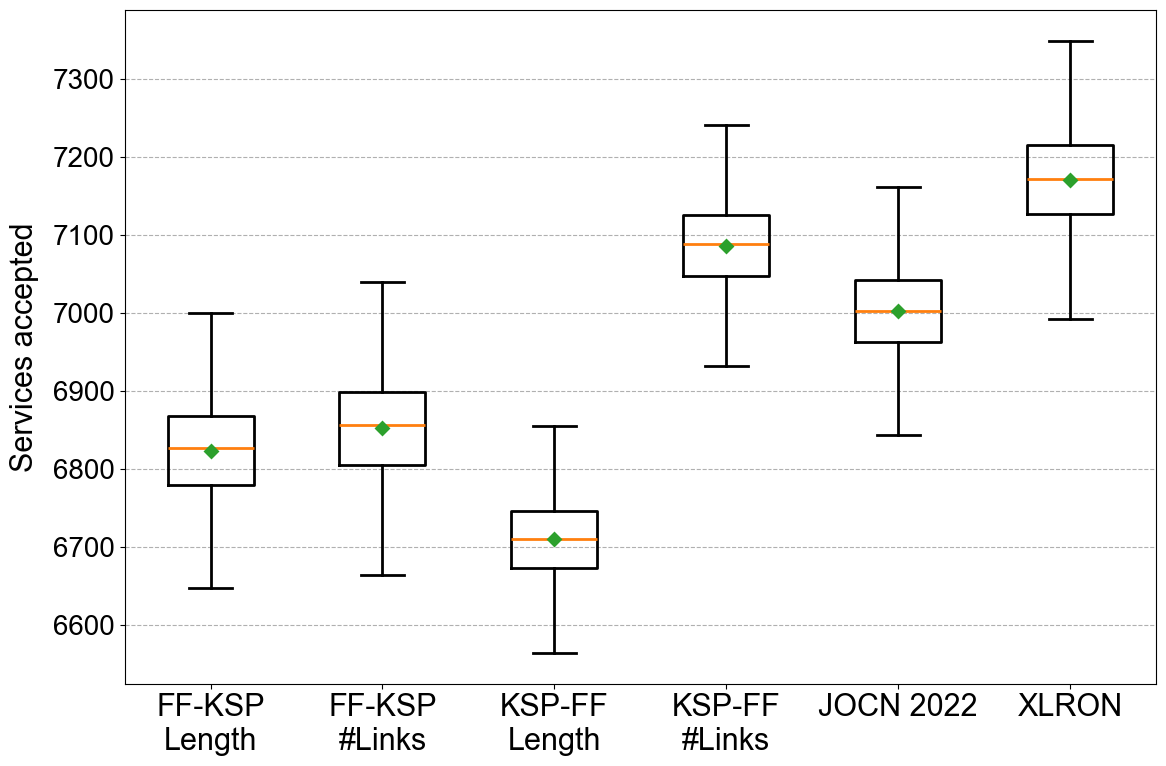

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

# Your existing code remains the same until the plt.figure() call

plt.figure(figsize=(12, 8))
ax = plt.subplot()
ax.bxp(
    results, 
    showfliers=False,
    showmeans=True,
    boxprops=dict(linewidth=2),
    whiskerprops=dict(linewidth=2),
    capprops=dict(linewidth=2),
    medianprops=dict(linewidth=2),
    meanprops=dict(marker='D', markeredgewidth=2)#, markerfacecolor='red')
)

# Define the font properties
font_props = fm.FontProperties(family='Arial', size=22)
number_props = fm.FontProperties(family='Arial', size=20)

# Set the y-axis label with the new font properties and increased padding
ax.set_ylabel('Services accepted', fontproperties=font_props, labelpad=10)  # Increased labelpad

# Gridlines
ax.grid(axis='y', linestyle='--')

# Apply font properties to tick labels
for label in ax.xaxis.get_ticklabels():
    label.set_fontproperties(font_props)
for label in ax.yaxis.get_ticklabels():
    label.set_fontproperties(number_props)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
plt.savefig(f"{data_dir}/boxplots.png")
plt.show()

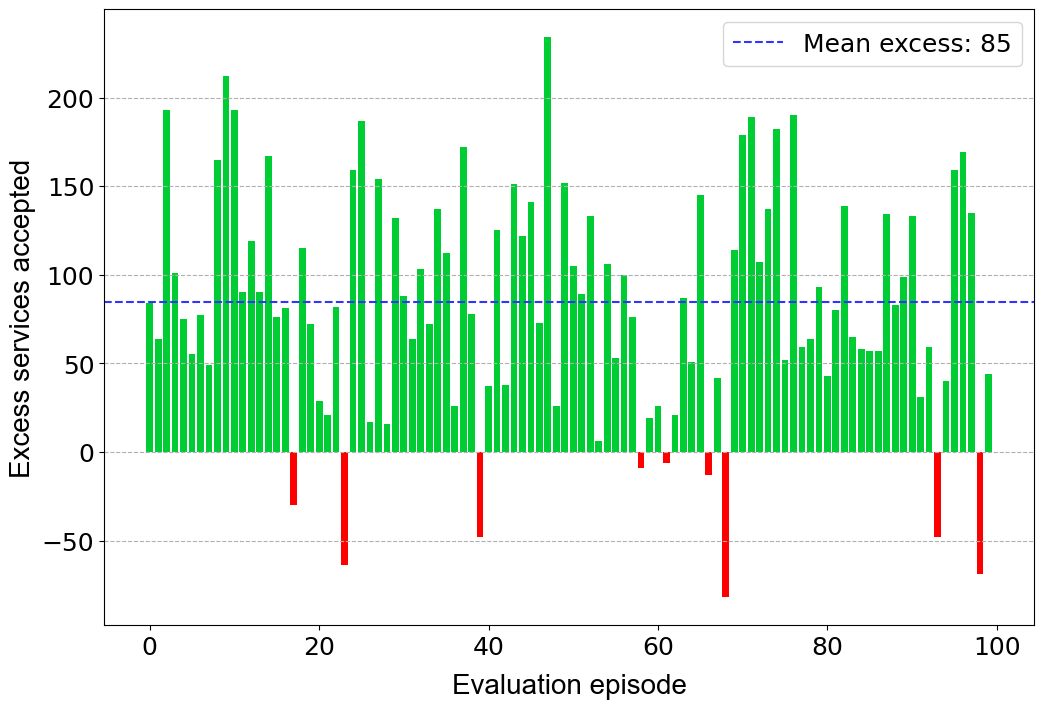

In [7]:
# Plot waterfall chart of difference between RL and KSP-FF
episode_count = np.arange(len(ksp_ff))
mean_excess = np.mean(model['accepted_services'] - ksp_ff['accepted_services'])
plt.figure(figsize=(12, 8))
plt.bar(episode_count, np.fmax(model['accepted_services'] - ksp_ff['accepted_services'], np.zeros(len(episode_count))), color='#00CC33')
# If the bar is negative, change colour to red
plt.bar(episode_count, np.fmin(model['accepted_services'] - ksp_ff["accepted_services"], np.zeros(len(episode_count))), color='r')


#plt.grid(axis='y')
# Add horizontal line for mean_excess
plt.axhline(y=mean_excess, color='#3333FF', linestyle='--', label=f'Mean excess: {mean_excess:.0f}')

# Define the font properties
font_props = fm.FontProperties(family='Arial', size=20)
number_props = fm.FontProperties(family='Arial', size=20)

# Set the y-axis label with the new font properties
plt.xlabel('Evaluation episode', fontproperties=font_props, labelpad=10)
plt.ylabel('Excess services accepted', fontproperties=font_props)


# Apply font properties to tick labels
for label in ax.xaxis.get_ticklabels():
    label.set_fontproperties(font_props)
for label in ax.yaxis.get_ticklabels():
    label.set_fontproperties(number_props)

# Gridlines
plt.grid(axis='y', linestyle='--')

# Add legend
plt.legend()


plt.savefig(f"{data_dir}/waterfall.png")

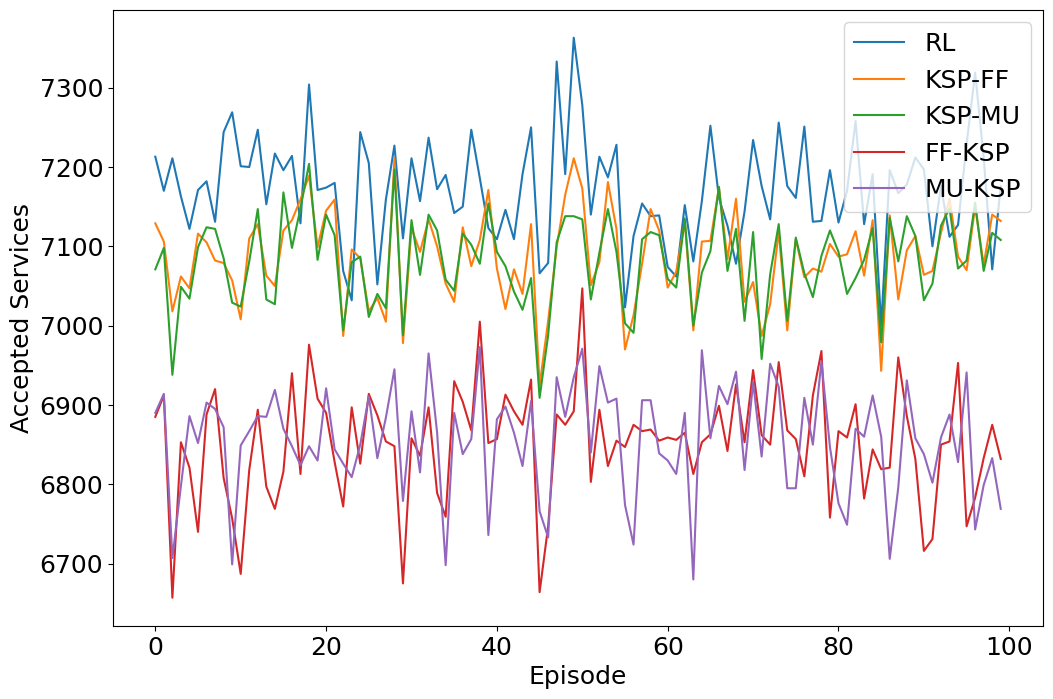

In [8]:
# Plot the data as line charts with epsiode number on the x-axis
plt.figure(figsize=(12, 8))
episode_count = np.arange(len(ksp_ff))

plt.plot(episode_count, model['accepted_services'], label='RL')
plt.plot(episode_count, ksp_ff['accepted_services'], label='KSP-FF')
plt.plot(episode_count, ksp_mu['accepted_services'], label='KSP-MU')
plt.plot(episode_count, ff_ksp['accepted_services'], label='FF-KSP')
plt.plot(episode_count, mu_ksp['accepted_services'], label='MU-KSP')
#plt.plot(episode_count, ksp_ff_weighted['accepted_services'], label='KSP-FF-Weighted')
#plt.plot(episode_count, ff_ksp_weighted['accepted_services'], label='FF-KSP-Weighted')
#plt.plot(episode_count, ksp_mu_weighted['accepted_services'], label='KSP-MU-Weighted')
#plt.plot(episode_count, mu_ksp_weighted['accepted_services'], label='MU-KSP-Weighted')
plt.xlabel('Episode')
plt.ylabel('Accepted Services')
plt.legend()

In [ ]:
# Plot the data on a box and whisker chart
plt.figure(figsize=(12, 8))
plt.boxplot(
    [ksp_ff['accepted_services'], 
     ksp_ff_weighted['accepted_services'], 
     ff_ksp['accepted_services'], 
     ff_ksp_weighted['accepted_services'], 
     ksp_mu['accepted_services'], 
     ksp_mu_weighted['accepted_services'], 
     mu_ksp['accepted_services'],
     mu_ksp_weighted['accepted_services'],
     ksp_mu_alt['accepted_services'],
     ksp_mu_alt_weighted['accepted_services'],
     mu_ksp_alt['accepted_services'],
     mu_ksp_alt_weighted['accepted_services'],
     model['accepted_services'], ],
    labels=['KSP-FF', 'KSP-FF-Weighted', 'FF-KSP', 'FF-KSP-Weighted', 'KSP-MU', 'KSP-MU-Weighted', 'MU-KSP', 'MU-KSP-Weighted', 'KSP-MU-Alt', 'KSP-MU-Alt-Weighted', 'MU-KSP-Alt', 'MU-KSP-Alt-Weighted', 'RL'],
    sym="",
    showmeans=True)
plt.ylabel('Accepted Services')
plt.title('Accepted Services')
plt.show()